# **MNIST Database Image Classification with Deploy Training**

-------

**Name:** Naufal Prima Yoriko <br/>
**Email:** primayoriko@gmail.com <br/>

# **A. Prepare Data**

## **1. Import Data**

using MNIST data from keras datasets

In [1]:
from keras.datasets import mnist

## **2. Load Data**

load the data into the test and train set, but in this notebook only test will be used.

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# **B. Explore Data**

See the dimension of dataset

In [3]:
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


Try to see some samples

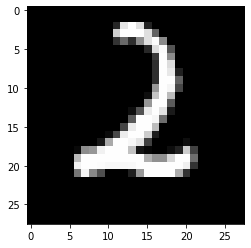

2
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  39 228 254 224  35   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 206 253 253 253 222  97   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 106  46 142 222 251 137
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  41 221 250
   84   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  59 253
  140   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  46 253
  220   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 

In [4]:
from matplotlib import pyplot

pyplot.imshow(train_X[122], cmap=pyplot.get_cmap('gray'))
pyplot.show()

print(train_y[122])
print(train_X[122])

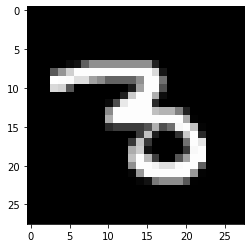

3
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0  11  19  95 143 143 143 143 143 143 143 143  33   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  90 149 208 253 253 253 253 253 253 253 253 253 

In [5]:
pyplot.imshow(train_X[30], cmap=pyplot.get_cmap('gray'))
pyplot.show()

print(train_y[30])
print(train_X[30])

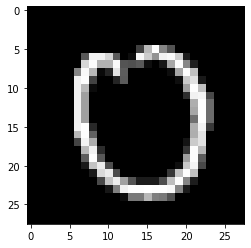

0
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  64 185 254 134
   83   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  90 241 241 213  91   0  13 247 203 146 242
  249 206  28   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 214 253 179 179 249  84  80  89  14   0  23
  168 253 135  30   0   0   0   0   0   0]
 [  0   0   0   0   0   0 133 249 185   9  37 228  93   0   0 

In [6]:
pyplot.imshow(test_X[1220], cmap=pyplot.get_cmap('gray'))
pyplot.show()

print(test_y[1220])
print(test_X[1220])

# **C. Preprocess Data**

## **1. Adjust set size**

From the specification, its spedified train:test = 8:2,  so it is must be 56000:14000, 4000 data on train must be moved.

In [7]:
import numpy as np

[a, b] = np.split(train_X, [56000])
test_X = np.concatenate((b, test_X))
train_X = a

[a, b] = np.split(train_y, [56000])
test_y = np.concatenate((b, test_y))
train_y = a

print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

Train: X=(56000, 28, 28), y=(56000,)
Test: X=(14000, 28, 28), y=(14000,)


## **2. Change dimension**

the feature array (X) should be in 4-dim to be processed in CNN by keras API, n now its only 3-dim. So the ndarray should be reshaped.

In [8]:
train_X = train_X.reshape(train_X.shape[0], 28, 28, 1)
test_X = test_X.reshape(test_X.shape[0], 28, 28, 1)

print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

Train: X=(56000, 28, 28, 1), y=(56000,)
Test: X=(14000, 28, 28, 1), y=(14000,)


## **3. Normalize the value**

the value in the pixel is now in scale of 0 - 255, to get better result, we could normalize it in the scale of 0 - 1.

In [9]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

train_X /= 255.0
test_X /= 255.0

# **D. Process Data**

## **1. Create model**

In [10]:
import tensorflow as tf

input_shape = (28, 28, 1)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(28, kernel_size=(3,3), input_shape=input_shape),
  tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10,activation='softmax'),
])

In [11]:
loss = 'sparse_categorical_crossentropy'
optimizer = 'adam'
metrics = ['accuracy']

model.compile(loss=loss,
              optimizer=optimizer,
              metrics=metrics)

## **2. Train Data**

In [12]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

n_batchs = 30
n_epochs = 12 

keras_dict = {
      'x': train_X,
      'y': train_y,
      'validation_data': (test_X, test_y),
      'batch_size': n_batchs,
      'epochs': n_epochs,
      'shuffle': False,
      'callbacks': [
           EarlyStopping(patience=5, restore_best_weights=True),
           ReduceLROnPlateau(patience=4)
      ]
  }

history = model.fit(**keras_dict)

Epoch 1/12
1867/1867 [==============================] - 35s 18ms/step - loss: 0.1939 - accuracy: 0.9421 - val_loss: 0.1226 - val_accuracy: 0.9604
Epoch 2/12
1867/1867 [==============================] - 34s 18ms/step - loss: 0.0674 - accuracy: 0.9795 - val_loss: 0.0883 - val_accuracy: 0.9719
Epoch 3/12
1867/1867 [==============================] - 34s 18ms/step - loss: 0.0403 - accuracy: 0.9873 - val_loss: 0.0915 - val_accuracy: 0.9735
Epoch 4/12
1867/1867 [==============================] - 34s 18ms/step - loss: 0.0242 - accuracy: 0.9922 - val_loss: 0.0747 - val_accuracy: 0.9795
Epoch 5/12
1867/1867 [==============================] - 34s 18ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0871 - val_accuracy: 0.9780
Epoch 6/12
1867/1867 [==============================] - 34s 18ms/step - loss: 0.0141 - accuracy: 0.9951 - val_loss: 0.0695 - val_accuracy: 0.9839
Epoch 7/12
1867/1867 [==============================] - 35s 18ms/step - loss: 0.0124 - accuracy: 0.9958 - val_loss: 0.0801 -

## **3. Visualize Result**

by create graph of it's metrics

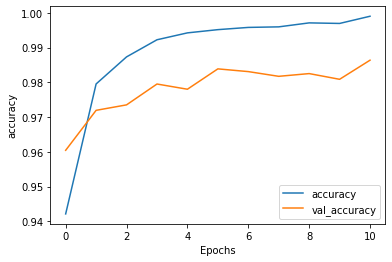

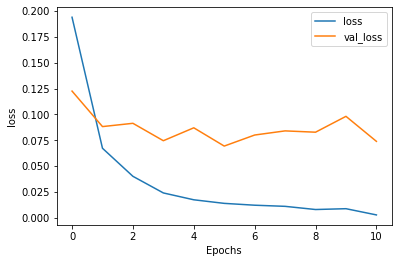

In [16]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

for val in metrics:
  plot_graphs(history, val)

plot_graphs(history, "loss")

# **D. Process Data**

By export with TF-Lite

In [17]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpe4v0xnm4/assets


In [18]:
!cat model.tflite

         `���         D���         0             
      Identity       ����
      \   L         
   4   sequential/dense_1/MatMul;sequential/dense_1/BiasAdd       ����
   ��������      $                             
         ����	      	   ����         l   \         �   F   sequential/dense/MatMul;sequential/dense/BiasAdd;sequential/dense/Relu     �����   0���  
     
               
      	      h���         L���         @   0         |     sequential/flatten/Reshape     ����|  ����                  <   0                                    	         ,���         ���   
      ����                0   $        
     
1����~>�O�>�H�=�_Z>j��=̞�=\@�=�I>��ҾNyW��a��L�<�q>@����ž-Q*��)�n4<�jH��M:��-C�ȱo������ �?�Ľc�>�.�>�$�=����>և������1��=�𭾢X��r���$�������>��M��/��c�����>�"M>.׃>29\>jT��ʊӽ0y����(($�qs��z�&Ϛ�-,%=��.�I�=�8A��ҽ�.�:�4����=��U>�
�>x��}�>�>�<5>�N)>����ԥ�x�

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

